In [1]:
#Import Stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.tree import DecisionTreeRegressor
import sys
sys.path
sys.path.append("/Users/Super/Desktop/Python-master/Python_Important")
print(sys.path)

['c:\\Users\\Super\\Desktop\\Python-master\\Python_Important\\School_Stuff', 'c:\\Users\\Super\\.vscode\\extensions\\ms-toolsai.jupyter-2020.12.414227025\\pythonFiles\\vscode_datascience_helpers\\..\\.does-not-exist', 'c:\\Users\\Super\\.vscode\\extensions\\ms-toolsai.jupyter-2020.12.414227025\\pythonFiles', 'c:\\Users\\Super\\.vscode\\extensions\\ms-toolsai.jupyter-2020.12.414227025\\pythonFiles\\lib\\python', 'C:\\Users\\Super\\AppData\\Local\\Programs\\Python\\Python38-32\\python38.zip', 'C:\\Users\\Super\\AppData\\Local\\Programs\\Python\\Python38-32\\DLLs', 'C:\\Users\\Super\\AppData\\Local\\Programs\\Python\\Python38-32\\lib', 'C:\\Users\\Super\\AppData\\Local\\Programs\\Python\\Python38-32', '', 'C:\\Users\\Super\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\Super\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32', 'C:\\Users\\Super\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib', 'C:\\Users\\Super\\AppData\\Roaming\\Python\\Python38\\s

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
file = '/Users/Super/Downloads/FitnessData.csv'
data = pd.read_csv(file)
display(data)


,No-Resources Fitness 1,NOT Fitness 1,No-Resources Frequency (%) 1,NOT Frequency (%) 1,No-Resources Fitness 2,NOT Fitness 2,No-Resources Frequency (%) 2,NOT Frequency (%) 2
0,0.31,0.26,60,40,0.31,0.53,35,65
1,0.28,0.39,44,57,0.33,0.51,49,67
2,0.30,0.31,50,50,0.30,0.45,40,60
3,0.31,0.31,50,50,0.31,0.61,20,80
4,0.26,0.26,55,45,0.36,0.54,60,40
5,0.38,0.31,60,40,0.38,0.61,30,70
6,0.31,0.32,49,51,0.31,0.63,45,55
7,0.34,0.24,55,45,0.34,0.47,35,65
8,0.31,0.29,55,45,0.31,0.57,35,65
9,0.31,0.27,55,45,0.31,0.54,25,75


In [3]:
display(data.describe())

,No-Resources Fitness 1,NOT Fitness 1,No-Resources Frequency (%) 1,NOT Frequency (%) 1,No-Resources Fitness 2,NOT Fitness 2,No-Resources Frequency (%) 2,NOT Frequency (%) 2
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.332500,0.320312,51.156250,48.250000,0.317500,0.528438,37.562500,61.187500
std,0.079677,0.062758,7.076127,7.093841,0.038437,0.128065,17.524062,17.984648
min,0.260000,0.240000,30.000000,40.000000,0.250000,0.250000,15.000000,20.000000
25%,0.295000,0.270000,49.750000,44.000000,0.300000,0.465000,26.500000,58.750000
50%,0.310000,0.310000,52.000000,45.000000,0.310000,0.530000,34.500000,65.500000
75%,0.370000,0.362500,55.000000,50.000000,0.345000,0.602500,41.250000,73.000000
max,0.610000,0.490000,60.000000,70.000000,0.380000,0.900000,80.000000,85.000000


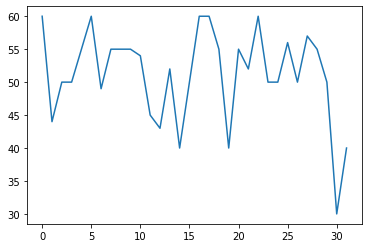

In [4]:
plt.plot(data["No-Resources Frequency (%) 1"])

Text(0.5, 1.0, 'NOTOSE Environment')

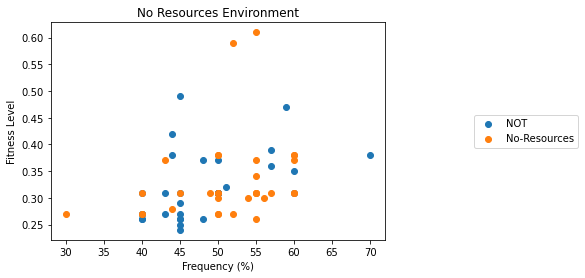

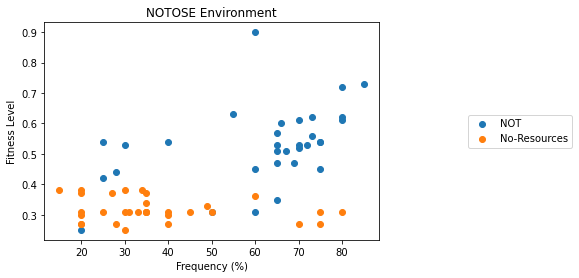

In [5]:
# Experiment 1 without Notose
plt.scatter(data["NOT Frequency (%) 1"],data["NOT Fitness 1"])
plt.scatter(data["No-Resources Frequency (%) 1"],data["No-Resources Fitness 1"])
plt.legend(("NOT", "No-Resources"),loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel("Frequency (%)")
plt.ylabel("Fitness Level")
plt.title("No Resources Environment")

plt.figure()

plt.scatter(data["NOT Frequency (%) 2"],data["NOT Fitness 2"])
plt.scatter(data["No-Resources Frequency (%) 2"],data["No-Resources Fitness 2"])
plt.legend(("NOT", "No-Resources"),loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel("Frequency (%)")
plt.ylabel("Fitness Level")
plt.title("NOTOSE Environment")


 1
Equation mse 0.0030286371945112177
Equation r2 0.20623365483875822

 2
Equation mse 0.005722606626603046
Equation r2 0.06949485746291895

 3
Equation mse 0.01282717123511812
Equation r2 0.19265967947626195

 4
Equation mse 0.001360119125776336
Equation r2 0.049698427405179935


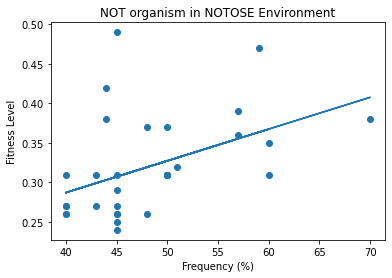

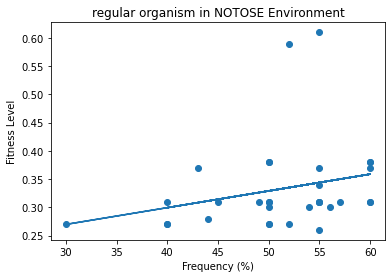

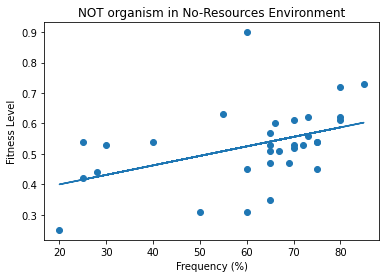

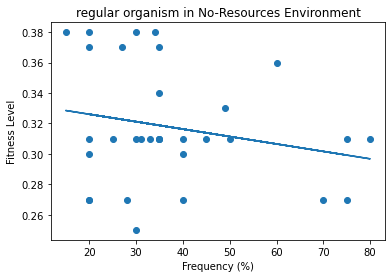

In [9]:
"""
Linear Regression
"""

X = ["NOT Frequency (%) 1", "No-Resources Frequency (%) 1", "NOT Frequency (%) 2", "No-Resources Frequency (%) 2"]
Y = ["NOT Fitness 1", "No-Resources Fitness 1", "NOT Fitness 2", "No-Resources Fitness 2"]

df = data.copy()

for i in range(len(Y)):
    plt.figure()
    plt.scatter(df[X[i]],df[Y[i]])
    plt.xlabel("Frequency (%)")
    plt.ylabel("Fitness Level")
    if i == 0:
        plt.title("NOT organism in NOTOSE Environment")
    if i == 1:
        plt.title("regular organism in NOTOSE Environment")
    if i == 2:
        plt.title("NOT organism in No-Resources Environment")
    if i == 3:
        plt.title("regular organism in No-Resources Environment")
    
    def mse(yTrue, yPred):
        yTrue, yPred = list(yTrue), list(yPred)
        total = 0 
        #Ypred is a list
        for i in range(0, len(yPred)):
            total += (yTrue[i]-yPred[i]) ** 2
        total /= len(yPred)
        return total

    # Analytical linear regression slope
    def linearRegression(x, y):
        x,y = np.array(x), np.array(y)
        x_mean, y_mean = np.mean(x), np.mean(y)
        a, b = 0, 0
        for i in range(0, len(x)):
            a += ((x[i] - x_mean) * (y[i] - y_mean))
            b += ((x[i] - x_mean) ** 2)
        
        slope = a/b
        y_int = y_mean - slope * x_mean

        y = slope * x + y_int
        return x, y

    x_new, y_new = (linearRegression(df[X[i]], df[Y[i]]))
    plt.plot(x_new,y_new)

    print("\n", i+1)
    print("Equation mse", mse(y_new, df[Y[i]]))

    # r2 value for the equation
    print("Equation r2", r2_score(list(df[Y[i]]), list(y_new)))


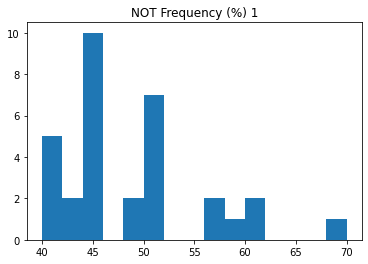

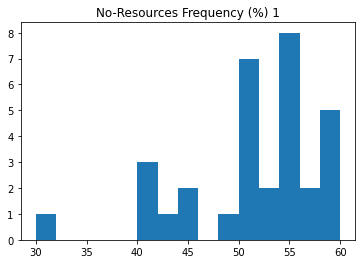

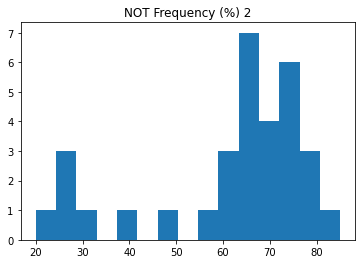

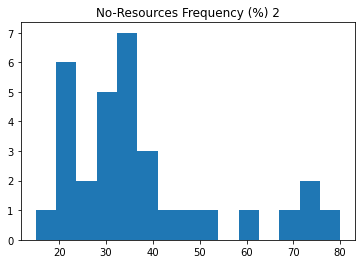

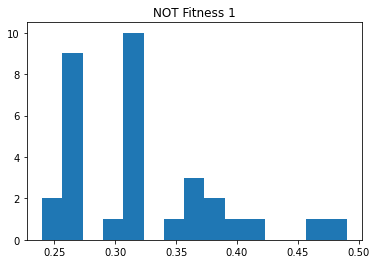

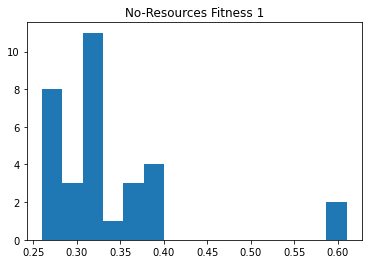

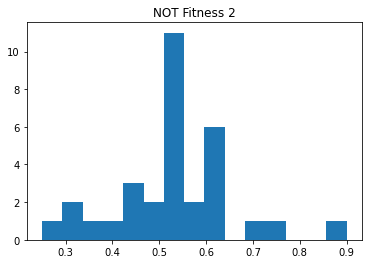

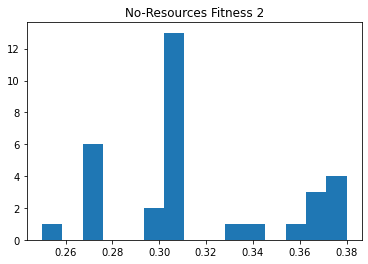

In [20]:
columns = ["NOT Frequency (%) 1", "No-Resources Frequency (%) 1", "NOT Frequency (%) 2", "No-Resources Frequency (%) 2","NOT Fitness 1", "No-Resources Fitness 1", "NOT Fitness 2", "No-Resources Fitness 2"]

for i in columns:
    plt.figure()
    plt.hist(df[i], bins=15)
    plt.title(i)